In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from statsmodels.formula.api import ols
from math import sqrt

>Load the tips dataset from either pydataset or seaborn.

In [3]:
from pydataset import data
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#determine if the total bill includes tip
tip_in = df.tip.mean() / df.total_bill.mean()
tip_out = df.tip.mean() / (df.total_bill.mean() - df.tip.mean() )
tip_in, tip_out

(0.15153580224410024, 0.17860011376425405)

In [5]:
#subtotal = bill without tip
df['subtotal'] = df.total_bill - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,subtotal
1,16.99,1.01,Female,No,Sun,Dinner,2,15.98
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68
3,21.01,3.50,Male,No,Sun,Dinner,3,17.51
4,23.68,3.31,Male,No,Sun,Dinner,2,20.37
5,24.59,3.61,Female,No,Sun,Dinner,4,20.98


Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)
The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,subtotal
1,16.99,1.01,Female,No,Sun,Dinner,2,15.98
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68
3,21.01,3.50,Male,No,Sun,Dinner,3,17.51
4,23.68,3.31,Male,No,Sun,Dinner,2,20.37
5,24.59,3.61,Female,No,Sun,Dinner,4,20.98


In [7]:
df['x'] = df.subtotal
df['y'] = df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,subtotal,x,y
1,16.99,1.01,Female,No,Sun,Dinner,2,15.98,15.98,1.01
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,8.68,1.66
3,21.01,3.50,Male,No,Sun,Dinner,3,17.51,17.51,3.50
4,23.68,3.31,Male,No,Sun,Dinner,2,20.37,20.37,3.31
5,24.59,3.61,Female,No,Sun,Dinner,4,20.98,20.98,3.61


In [8]:
# model = ols('y ~ x', data=df).fit()
# df['yhat'] = model.predict(df.total_bill)




ols_model = ols('y ~ x', data=df).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           5.02e-23
Time:                        12:15:12   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
x              0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
df['yhat'] = ols_model.predict(df.x)


In [10]:
df['residual'] = df.yhat - df.y
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,subtotal,x,y,yhat,residual
1,16.99,1.01,Female,No,Sun,Dinner,2,15.98,15.98,1.01,2.91805,1.90805


Plot the residuals for the linear regression model that you made.

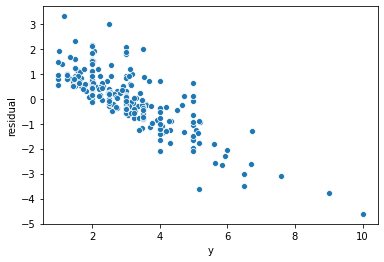

In [11]:
x = df.y
y = df.residual

sns.scatterplot(x, y, data=df)

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [12]:
sse = sum(df.residual**2)
sse

310.51037975282367

In [13]:
ess_mean = df.y.mean()

ess = sum((df.yhat - ess_mean)**2)
ess

154.70209729635695

In [14]:
tss = ess+sse
tss

465.2124770491806

In [15]:
mse = sse/len(df.x)
mse

1.272583523577146

In [16]:
rmse = sqrt(mse)
rmse

1.12808843783506

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [17]:
df['y_mu'] = df.y.mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,subtotal,x,y,yhat,residual,y_mu
1,16.99,1.01,Female,No,Sun,Dinner,2,15.98,15.98,1.01,2.918050,1.908050,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,8.68,1.66,2.192915,0.532915,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,17.51,17.51,3.50,3.070031,-0.429969,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,20.37,20.37,3.31,3.354125,0.044125,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,20.98,20.98,3.61,3.414719,-0.195281,2.998279


In [18]:
sse_mu = sum((df.y - df.y_mu)**2)
sse_mu

465.21247704918085

In [19]:
ess_mean = df.y.mean()

ess_mu = sum((df.y_mu - ess_mean)**2)
ess_mu

0.0

In [20]:
tss_mu = ess_mu+sse_mu
tss_mu

465.21247704918085

In [21]:
mse_mu = sse_mu/len(df.x)
mse_mu

1.9066085124966428

In [22]:
rmse_mu = sqrt(mse_mu)
rmse_mu

1.3807999538298958

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [23]:
def compare_to_baseline(sse, sse_mu):
    return sse < sse_mu

In [24]:
compare_to_baseline(sse, sse_mu)

True

What is the amount of variance explained in your model?

In [25]:
print(f'{ess} is the amount of variance explained in the model')

154.70209729635695 is the amount of variance explained in the model


Is your model significantly better than the baseline model?

In [26]:
r2 = ols_model.rsquared

r2_mu = ess_mu/ tss_mu

print(f'r2 = {r2} which is not a particularly good model but it is significantly better than r2_mu')

r2 = 0.3325407312323706 which is not a particularly good model but it is significantly better than r2_mu


In [27]:
# plot_residuals(y, yhat): creates a residual plot
y = df.y
yhat = df.yhat

def plot_residuals(y, yhat):
    return sns.scatterplot(y, yhat, data=df)
    

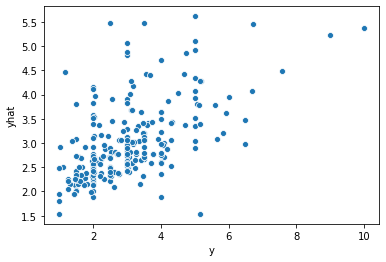

In [28]:
plot_residuals(y, yhat)

In [29]:
# regression_errors(y, yhat): returns the following values:
from math import sqrt

def regression_errors(y, yhat):
    mu = y.mean()
    sse = sum((y-yhat)**2)
    ess = sum((yhat - mu))
    tss = ess + sse
    mse = sse/ len(y)
    rmse = sqrt(mse)
    return sse, ess, tss, mse, rmse
    
    
    

In [30]:
regression_errors(df.y, df.yhat)

(310.51037975282367,
 1.5054624213917123e-13,
 310.51037975282384,
 1.272583523577146,
 1.12808843783506)

In [31]:
# baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
def baseline_mean_errors(y):
    mu = y.mean()
    sse_mu = sum((y - mu)**2)
    mse_mu = sse_mu/len(y)
    rmse_mu = sqrt(mse_mu)
    return sse_mu, mse_mu, rmse_mu
    

In [32]:
baseline_mean_errors(y)

(465.21247704918085, 1.9066085124966428, 1.3807999538298958)

In [33]:
# better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
def better_than_baseline(y, yhat):
    regression_errors(y, yhat)
    baseline_mean_errors(y)
    return sse < sse_mu

In [34]:
better_than_baseline(df.y, df.yhat)

True

In [35]:
# model_significance(ols_model): that takes the ols model as input and returns the amount of 
# variance explained in your model, and the value telling you whether your model is significantly
# better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model

In [36]:
def model_significance(ols_model):
    return ols_model.rsquared, ols_model.f_pvalue

In [37]:
model_significance(ols_model)

(0.3325407312323706, 5.0182900849483903e-23)

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [38]:
mpg = data('mpg')

In [39]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [50]:
# build a model that determines hwy mileage based on engine displacement
x = mpg.displ
y = mpg.hwy

ols_model = ols('y ~ x', data=mpg).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     329.5
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           2.04e-46
Time:                        12:21:13   Log-Likelihood:                -645.62
No. Observations:                 234   AIC:                             1295.
Df Residuals:                     232   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6977      0.720     49.555      0.000      34.278      37.117
x             -3.5306      0.195    -18.151      0.000      -3.914      -3.147
==============================================================================
Omnibus:                       45.280   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.192
Skew:                           0.961   Prob(JB):                     2.60e-20
Kurtosis:                       5.357   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
mpg['yhat'] = ols_model.predict()

In [44]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002


In [45]:
regression_errors(mpg.hwy, mpg.yhat)

(3413.829008995462,
 2.248867758680717e-12,
 3413.8290089954644,
 14.589012858954966,
 3.8195566312014497)

In [46]:
baseline_mean_errors(mpg.hwy)

(8261.662393162384, 35.30624954342899, 5.941906221359353)

In [47]:
better_than_baseline(mpg.hwy, mpg.yhat)

True

In [48]:
model_significance(ols_model)

(0.5867866723989039, 2.0389744555910457e-46)

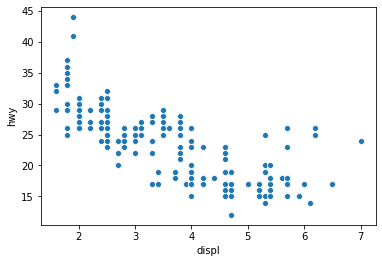

In [52]:
sns.scatterplot(x, y, data= mpg)